# Meshgrid examples

Covering indexing and speed

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,7,8)
y = np.linspace(0,3,4)

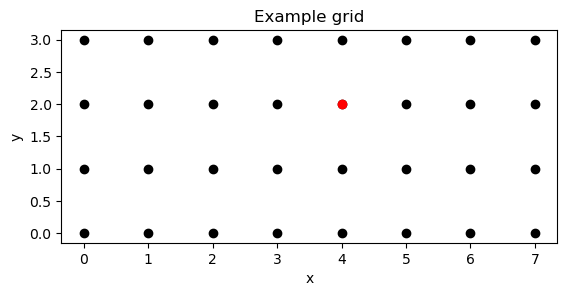

In [6]:
for xpoint in x:
    for ypoint in y:
        plt.plot(xpoint,ypoint,'ko')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example grid')
plt.plot(x[4],y[2],'ro')

In [7]:
x2d, y2d = np.meshgrid(x,y)

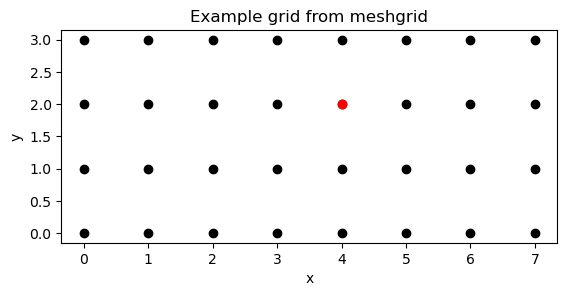

In [14]:
plt.plot(x2d,y2d,'ko')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example grid from meshgrid')
plt.plot(x2d[2,4],y2d[2,4],'ro')

In [11]:
print("x from meshgrid: \n",x2d)

x from meshgrid: 
 [[0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]]


In [12]:
print("y from meshgrid: \n",y2d)

y from meshgrid: 
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3.]]


Text(0.5, 1.0, '2D array of x positions')

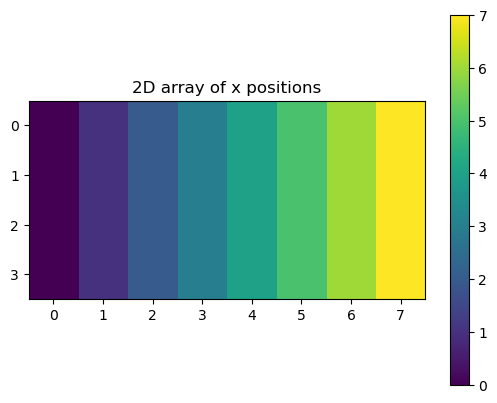

In [16]:
plt.imshow(x2d)
plt.colorbar()
plt.title("2D array of x positions")

Text(0.5, 1.0, '2D array of y positions')

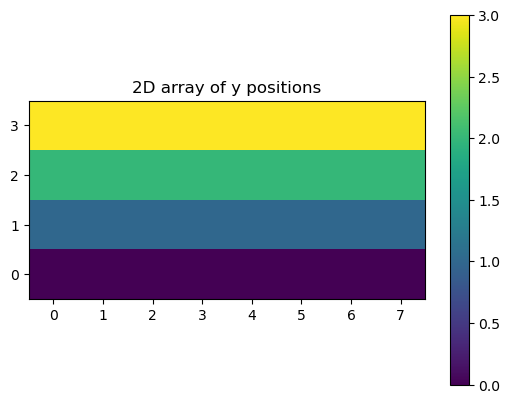

In [18]:
plt.imshow(y2d,origin='lower')
plt.colorbar()
plt.title("2D array of y positions")

*Important* By default, `np.meshgrid` returns arrays with row-column ordering: `[r,c]`

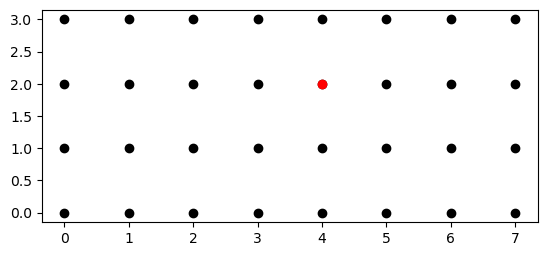

In [20]:
x2d_ij, y2d_ij = np.meshgrid(x,y,indexing='ij')
plt.plot(x2d_ij,y2d_ij,'ko')
plt.axis('scaled')
plt.plot(x2d_ij[4,2],y2d_ij[4,2],'ro')

In [21]:
print("x array with ij indexing: \n",x2d_ij)

x array with ij indexing: 
 [[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


## Speed of operations

In [22]:
N = 301
xl = np.linspace(0,1,N)
yl = np.linspace(0,1,N)

In [23]:
%%time
ra = np.zeros((N,N))
for i, xv in enumerate(xl):
    for j, yv in enumerate(yl):
        ra[i,j] = np.sqrt(xv**2 + yv**2)

CPU times: user 140 ms, sys: 5.42 ms, total: 146 ms
Wall time: 143 ms


In [24]:
%%time
x2d_l, y2d_l = np.meshgrid(xl,yl)
rb = np.sqrt(x2d_l**2 + y2d_l**2)

CPU times: user 1.77 ms, sys: 1.93 ms, total: 3.7 ms
Wall time: 2.11 ms


Text(0, 0.5, 'y')

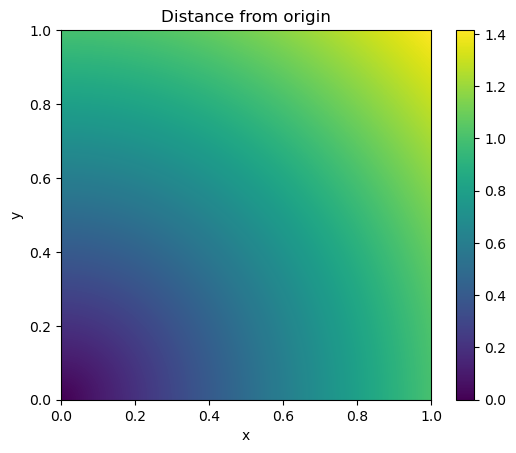

In [28]:
plt.imshow(rb,extent=(0,1,0,1),origin='lower')
plt.colorbar()
plt.title("Distance from origin")
plt.xlabel('x')
plt.ylabel('y')

(0.0, 1.0, 0.0, 1.0)

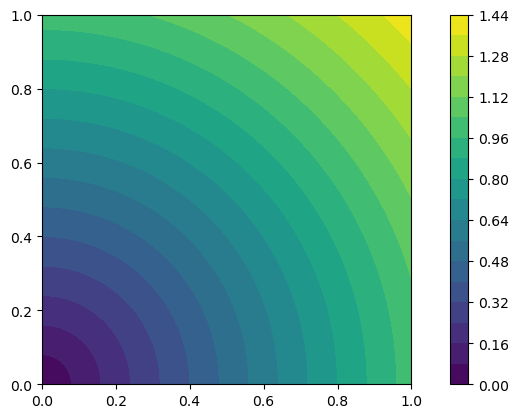

In [34]:
plt.contourf(x2d_l,y2d_l,rb,levels=20)
plt.colorbar()
plt.axis('scaled')